### Import Libraries & Load Data

In [4]:
# Import libraries
import numpy as np
import pandas as pd
from tqdm import tqdm

# My functions
import EDA_functions as EDA
import cleaning_functions as cleaning

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
color = 'rebeccapurple'
%matplotlib inline

# Display settings
from IPython.display import display
pd.options.display.max_columns = 100

In [3]:
# Load data
betriebe = pd.read_csv('vr_betriebe.csv', delimiter = ";", index_col = 0)

# Check results
print(str(betriebe.shape) + "\n")
print(betriebe.info())
display(betriebe.head())


(74, 8)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74 entries, 10698 to 10260
Data columns (total 8 columns):
Name        74 non-null object
Region      74 non-null object
ue_jul17    74 non-null int64
ur_jul17    74 non-null float64
vol_17      74 non-null int64
ue_dez16    74 non-null int64
ur_dez16    74 non-null float64
vol_16      74 non-null int64
dtypes: float64(2), int64(4), object(2)
memory usage: 5.2+ KB
None


,Name,Region,ue_jul17,ur_jul17,vol_17,ue_dez16,ur_dez16,vol_16
Nr,,,,,,,,
10698,Dübendorf,Zürich Stadt,-1670094,-0.0144,4097,-1891070,-0.0092,3970
10254,Châtelaine,Romandie,-1079990,-0.0261,1284,292959,0.0038,1218
10320,Lausanne,Romandie,-1020184,-0.0261,1931,-1454533,-0.0202,1772
10500,Solothurn,ZMB,-988887,-0.0874,740,-1438109,-0.0635,561
10655,AOC Sihlbrugg,ZMB,-837386,-0.0432,0,-578500,-0.0165,0


In [4]:
# Size units
for col in betriebe:
    if col[:2] == 'ue':
        betriebe[col] = betriebe[col] / 1000
    if col[:2] == 'ur':
        betriebe[col] = betriebe[col] * 100
    
# Check results
display(betriebe.head())

,Name,Region,ue_jul17,ur_jul17,vol_17,ue_dez16,ur_dez16,vol_16
Nr,,,,,,,,
10698,Dübendorf,Zürich Stadt,-1670.094,-1.44,4097,-1891.070,-0.92,3970
10254,Châtelaine,Romandie,-1079.990,-2.61,1284,292.959,0.38,1218
10320,Lausanne,Romandie,-1020.184,-2.61,1931,-1454.533,-2.02,1772
10500,Solothurn,ZMB,-988.887,-8.74,740,-1438.109,-6.35,561
10655,AOC Sihlbrugg,ZMB,-837.386,-4.32,0,-578.500,-1.65,0


In [14]:
betriebe['col_17'] = np.where((betriebe['ur_jul17'] < 0), 'red', 'green')
betriebe['col_16'] = np.where((betriebe['ur_dez16'] < 0), 'red', 'green')

,Name,Region,ue_jul17,ur_jul17,vol_17,ue_dez16,ur_dez16,vol_16,col_17,col_16
Nr,,,,,,,,,,
10698,Dübendorf,Zürich Stadt,-1670.094,-1.44,4097,-1891.070,-0.92,3970,red,red
10254,Châtelaine,Romandie,-1079.990,-2.61,1284,292.959,0.38,1218,red,green
10320,Lausanne,Romandie,-1020.184,-2.61,1931,-1454.533,-2.02,1772,red,red
10500,Solothurn,ZMB,-988.887,-8.74,740,-1438.109,-6.35,561,red,red
10655,AOC Sihlbrugg,ZMB,-837.386,-4.32,0,-578.500,-1.65,0,red,red


### Plot Scatters of All Branches

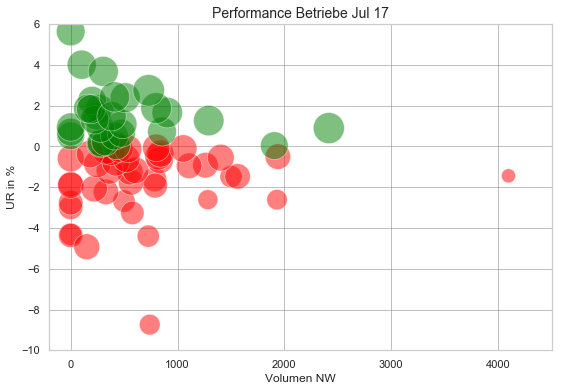

In [46]:
# Plot scatter of all branches, 2017
fig, ax = plt.subplots(figsize=(9, 6))
sns.scatterplot(x='vol_17', y='ur_jul17', data=betriebe, size='ue_jul17', hue='col_17',
            sizes=(200,1000), palette=['red', 'green'], alpha = 0.5, legend=False, ax=ax)

plt.axis([-200, 4500, -10, 6])
plt.grid(color='grey', linestyle='-', linewidth=0.5)
plt.title("Performance Betriebe Jul 17", fontsize=14)
plt.xlabel("Volumen NW", fontsize=12)
plt.ylabel("UR in %", fontsize=12);
# plt.tick_params(axis='both', which='major', labelsize=8)

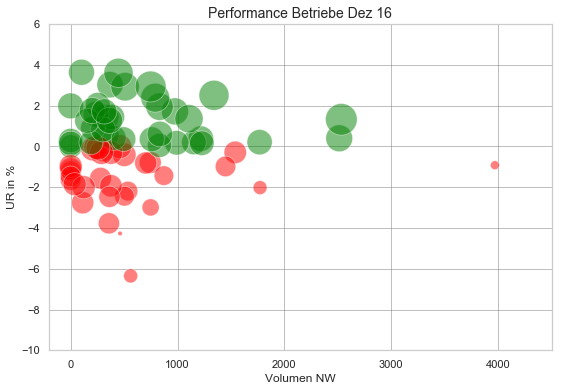

In [48]:
# Plot scatter of all branches, 2016
fig, ax = plt.subplots(figsize=(9, 6))
sns.scatterplot(x='vol_16', y='ur_dez16', data=betriebe, size='ue_dez16', hue='col_16', 
                sizes=(20,1000), palette=['red', 'green'], alpha = 0.5, legend=False, ax=ax)

plt.axis([-200, 4500, -10, 6])
plt.grid(color='grey', linestyle='-', linewidth=0.5)
plt.title("Performance Betriebe Dez 16", fontsize=14)
plt.xlabel("Volumen NW", fontsize=12)
plt.ylabel("UR in %", fontsize=12);
# plt.tick_params(axis='both', which='major', labelsize=8)

### Plot Scatters of Top / Flop Branches

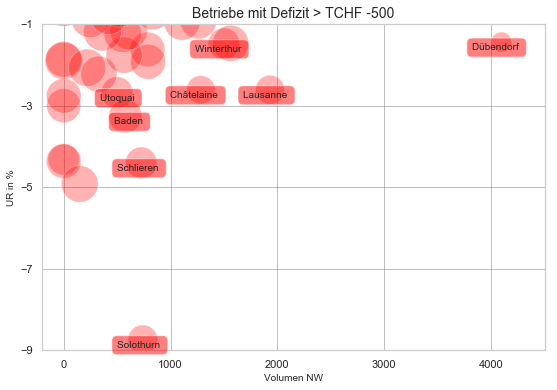

In [51]:
# Bottom locations
fig, ax = plt.subplots(figsize=(9, 6))
sns.scatterplot(x='vol_17', y='ur_jul17', data=betriebe, size='ue_jul17', 
                sizes=(400,2000), color='red', alpha = 0.3, legend=False, ax=ax)

plt.axis([-200, 4500, -9, -1])
plt.yticks([-1,-3,-5,-7,-9])
plt.grid(color='grey', linestyle='-', linewidth=0.5)
plt.title("Betriebe mit Defizit > TCHF -500", fontsize=14)
plt.xlabel("Volumen NW", fontsize=10)
plt.ylabel("UR in %", fontsize=10)
# plt.tick_params(axis='both', which='major', labelsize=8)

betr_17 = betriebe[['Name', 'vol_17', 'ur_jul17', 'ue_jul17']]

for label, x, y, s in betr_17.itertuples(index=False):
    if s < -500 and label[0:3] != "AOC":
        ax.annotate(
            label,
            xy=(x, y), xytext=(20, -10),
            textcoords='offset points', ha='right', va='bottom',
            bbox=dict(boxstyle='round, pad=0.5', fc='red', alpha=0.5))
            
# plt.savefig('betriebe_bottom.png', bbox_inches='tight', dpi=200)

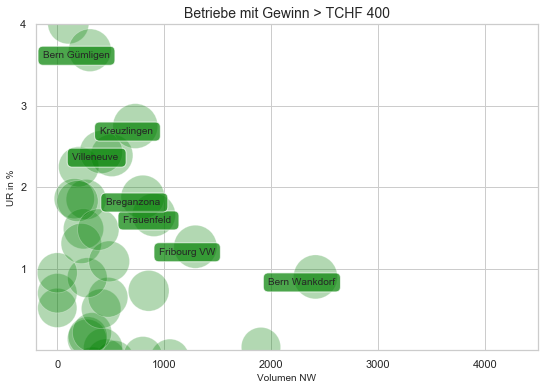

In [56]:
# Top locations
fig, ax = plt.subplots(figsize=(9, 6))
sns.scatterplot(x='vol_17', y='ur_jul17', data=betriebe, size='ue_jul17', 
                sizes=(400,2000), color='green', alpha = 0.3, legend=False, ax=ax)

plt.axis([-200, 4500, 0, 4])
plt.yticks([1,2,3,4])
plt.title("Betriebe mit Gewinn > TCHF 400", fontsize=14)
plt.xlabel("Volumen NW", fontsize=10)
plt.ylabel("UR in %", fontsize=10)
# plt.tick_params(axis='both', which='major', labelsize=8)

betr_17 = betriebe[['Name', 'vol_17', 'ur_jul17', 'ue_jul17']]

for label, x, y, s in betr_17.itertuples(index=False):
    if s > 400:
        plt.annotate(
            label,
            xy=(x, y), xytext=(20, -10),
            textcoords='offset points', ha='right', va='bottom',
            bbox=dict(boxstyle='round,pad=0.5', fc='green', alpha=0.7))
            
# plt.savefig('betriebe_top.png', bbox_inches='tight', dpi=200)

### Appendix: Code example for labels

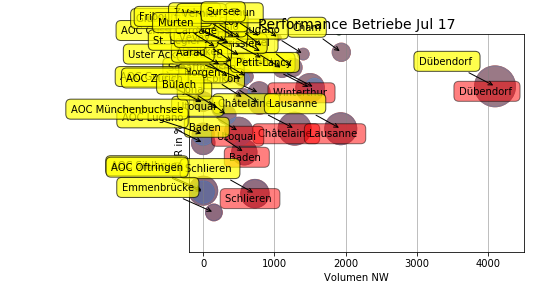

In [8]:
plt.scatter(x = vol, y = ur, s = ue, c = ur, cmap=plt.cm.coolwarm, alpha = 0.4)

plt.axis([-200, 4500, -6, 0])
plt.title("Performance Betriebe Jul 17", fontsize=14)
plt.xlabel("Volumen NW", fontsize=10)
plt.ylabel("UR in %", fontsize=10)
# plt.tick_params(axis='both', which='major', labelsize=8)

for label, x, y in zip(labels, vol, ur):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.7),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

---

### Print development of focus branches

In [8]:
# Load data
fokus = pd.read_csv('data/vr_fokus_pivot.csv', delimiter = ";", index_col = 0)

display(fokus)

,Dübendorf,Châtelaine,Lausanne,Solothurn,Winterthur,Schlieren,Utoquai,Baden
Ist 15,-2543.697,1472.433,76.590,-1178.225,-1389.496,-1375.083,-2614.424,0.000
Ist 16,-1891.070,292.959,-1454.533,-1438.109,-277.113,-1070.587,-2117.847,-139.499
Ist Jul17,-1670.094,-1079.990,-1020.184,-988.887,-807.407,-803.478,-783.282,-639.362
Bud 17,-995.292,-331.028,-235.287,-1120.961,-189.889,-1050.477,-991.511,-745.766
Plan 18,-989.555,1630.786,-490.571,-944.672,-152.929,-267.413,-880.403,-481.533
Plan 19,-871.543,1867.593,-496.645,-994.749,-212.718,-267.413,-747.526,-76.195
Plan 20,-743.006,497.349,-359.558,-1014.721,-34.092,-267.413,-750.133,127.517
Plan 21,-793.300,561.226,-364.233,-1039.026,-32.769,-267.413,-646.583,373.343
Plan 22,-693.376,554.619,-262.269,-1023.312,-34.455,-267.413,-577.425,482.272


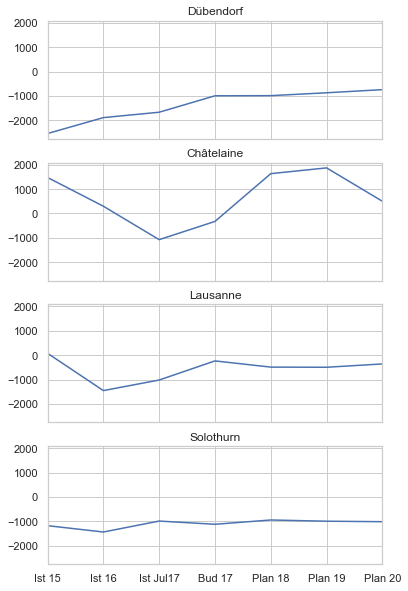

In [9]:
fig, axes = plt.subplots(4, 1, sharey=True, sharex='col', figsize=(6, 10))
                                                            
fokus['Dübendorf'][0:7].plot(ax=axes[0], title = 'Dübendorf', grid=True)
fokus['Châtelaine'][0:7].plot(ax=axes[1], title = 'Châtelaine', grid=True)
fokus['Lausanne'][0:7].plot(ax=axes[2], title = 'Lausanne', grid=True)
fokus['Solothurn'][0:7].plot(ax=axes[3], title = 'Solothurn', grid=True);

# plt.savefig('fokus1.png', bbox_inches='tight', dpi=200)

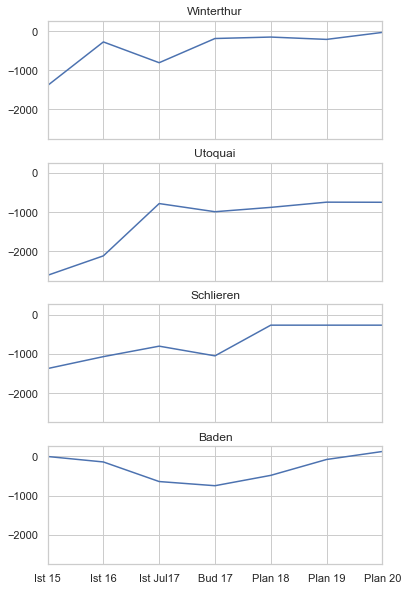

In [10]:
fig, axes = plt.subplots(4, 1, sharey=True, sharex='col', figsize=(6, 10))
                                                            
fokus['Winterthur'][0:7].plot(ax=axes[0], title = 'Winterthur', grid=True)
fokus['Utoquai'][0:7].plot(ax=axes[1], title = 'Utoquai', grid=True)
fokus['Schlieren'][0:7].plot(ax=axes[2], title = 'Schlieren', grid=True)
fokus['Baden'][0:7].plot(ax=axes[3], title = 'Baden', grid=True);

# plt.savefig('fokus1.png', bbox_inches='tight', dpi=200)

---